In [1]:
import itertools

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [14, 8]
# plt.rcParams['axes.grid'] = True

In [15]:
# OBS: O log gerado e lido como CSV aqui usava o tempo em segundos, e não microssegundos, como ficou no programa final.
# O log levou mais de um dia para ser gerado, por causa de problemas com a pilha e com o QPE, 
# e por isso não foi executado outra vez só para mudar a unidade de tempo.
df = pd.read_csv('results.log', sep=' ', index_col=['tamanho_vetor', 'tipo_sort', 'ord_vetor'])
df = df.unstack().unstack()

In [4]:
tipos_sort = ('QC', 'QM3', 'QI1', 'QI5', 'QI10', 'QNR', 'QPE')
tipos_vetor = ('Ale', 'OrdC', 'OrdD')

In [5]:
def plotar_comparativo(ylabel, ordem):
    dff = df[ylabel][ordem].copy()
    dff.plot(kind='bar', width=0.9)
    plt.title(ordem)
    plt.grid(True, axis='y')
    plt.xlabel('tamanho_vetor')
    plt.yscale('log')
    plt.ylabel(ylabel)
    plt.legend()

# Introdução
O programa atual foi escrito em C++ para comparar diversas implementações distintas do algoritmo de ordenação do quicksort. Nele, foram analisados o quicksort clássico (QC), que usa como pivô o elemento central de cada partição do vetor; o quicksort não recursivo usando como pivô a mediana dos dois extremos e o elemento central (QNR); o quicksort de mediana desses três elementos, mas implementado recursivamente (QM3); o quicksort implementado usando o primeiro elemento da partição como pivô (QPE); e quicksorts que, ao atingirem um percentual mínimo do vetor sendo partido, passam a implementar inserção (1%, 5% e 10%, ou QI1, QI5 e QI10, respectivamente).

O quicksort usa a estratégia de dividir para conquistar, e, por simplicidade de código, geralmente é implementado usando recursividade. Ele quebra um vetor em duas partes e chama a si mesmo em cada parte (ou partição) desse vetor, usando de forma arbitrária algum elemento dos subvetores para repartir e chamar novamente de forma recursiva. Os elementos maiores que o pivô são trocados com os menores quando estão na partição errada. Assim, é esperado que os quicksorts que fazem uma escolha mais cautelosa dos pivôs venham a lidar melhor com casos extremos (como quando o vetor está ordenado de forma decrescente ou crescente); por isso, é esperado que o QC, QM3 e o QNR apresentem bons resultados, tanto nos casos de entrada aleatória quando no melhor e pior caso. Os algoritmos de quicksort apresentam complexidade da ordem O(n\*log(n)), enquanto o de inserção possui complexidade maior, O(n²). É esperado, portanto, que, quanto maior o percentual mínimo para iniciar a inserção, mais demorado seja a execução. Os resultados são apresentados ao final desse documento.

# Implementação


O programa foi dividido nos seguintes módulos:
- main: o programa princial;
- pilha: responsável por implementar a pilha usada pelo algoritmo não-recursivo;
- quicksort: uma classe responsável por executar os algoritmos, além de manter a contagem de comparações e de movimentações entre elementos do vetor, e de cronometrar o tempo de execução;
- vector_generator: responsável por gerar vetores em ordem crescente, decrescente ou aleatória;
- argparser: responsável por fazer o parsing dos argumentos de entrada.

# Instruções de compilação e execução

Para compilar o programa, basta estar no diretório raiz e digitar no terminal:
```bash
make```

Para executar o programa, use:
```bash
./biblioteca.out <variacao> <tipo> <tamanho> [-p]```

Onde variacao é qual algoritmo se deseja usar (QC, QPE, QM3, QI1, QI5, QI10 ou QNR), tipo é o tipo de vetor de entrada - aleatório, crescente ou decrescente (Ale, OrdC, OrdD), tamanho é o tamanho do vetor de entrada e [-p] é um parâmetro opcional que imprime os vetores usados nos testes.

# Análise experimental

Os diretórios aux e analise, localizados na pasta raiz, foram usados para gerar a bateria de testes a ser executada e para plotar gráficos e escrever o relatório final do projeto. Essa seção analisa como foi a execução em cada caso, relativo ao tempo de duração, número de movimentações e de comparações entre elementos do vetor, além de testar nos casos de entrada aleatória, ordenada crescente e ordenada decrescente, em cada algoritmo que foi implementado.

## Comparação de tempo

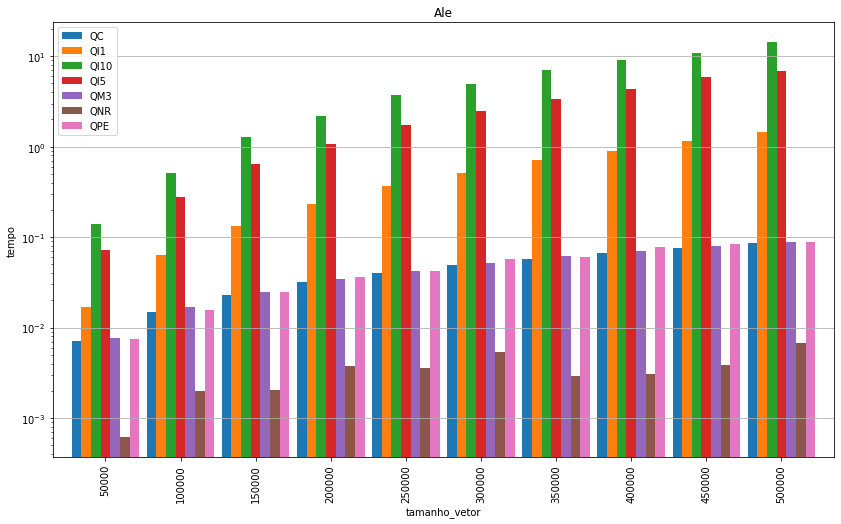

In [6]:
plotar_comparativo('tempo', 'Ale')

Com entrada aleatória, o quicksort não-recursivo apresenta o melhor tempo de execução, sendo o único que não atingiu sequer um centésimo de segundo para ordenar o vetor, mesmo com tamanho de 500k. O quicksort com pivô no primeiro elemento (QPE), pivô de mediana de 3 elementos e o quicksort clássico mostram comportamento similar, oscilando de 0,01 a 0,1 segundo de duração para ordenar o vetor de tamanho variando de 50k a 500k elementos. Os quicksorts mistos com inserção de 1%, 5% e 10% apresentam os piores tempos, com tempo aumentando proporcionalmente com o aumento no percentual mínimo para iniciar o algoritmo de iserção. 

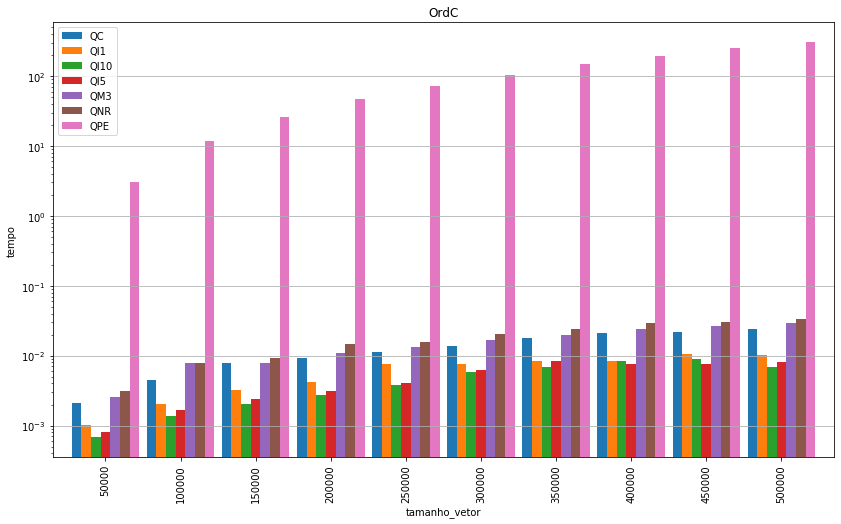

In [7]:
plotar_comparativo('tempo', 'OrdC')

O quicksort com pivô no primeiro elemento apresenta, de longe, o pior resultado. Para extrair a mediana dos tempos do QPE, foram necessárias cerca de 8 horas de benchmarking. Também houve problema de estourar a pilha apenas com esse algoritmo, criando-se a necessidade de aumentar o tamanho da pilha para que ele pudesse executar apropriadamente. Ele foi o único algoritmo a demorar um tempo na casa de 10^2 segundos (alguns chegaram a 400 segundos - mais de 10 minutos por vetor ordenado). O quicksort não-recursivo, o quicksort de mediana 3 e o quicksort clássico novamente classificam-se no mesmo grupo, mas dessa vez obtendo o segundo melhor desempenho, ao invés do primeiro. O grupo dos algoritmos mistos com inserção mostraram o melhor desempenho nesse caso.

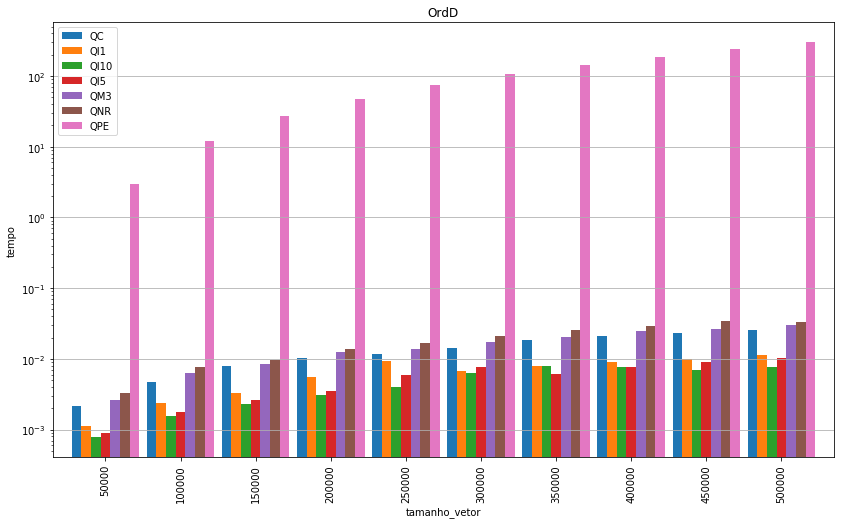

In [8]:
plotar_comparativo('tempo', 'OrdD')

De forma similar ao caso do vetor ordenado crescente, o vetor ordenado decrescente também resultou em três grupos: o quicksort com pivô no primeiro elemento (QPE) mostrou o pior tempo; o grupo QNR/QM3/QC (grupo 2) mostrou o segundo melhor desempelho e os algoritmos mesclados com inserção (grupo 3) mostraram o melhor desempenho por tempo. No entanto, a melhoria no desemenho, tanto no caso da ordem crescente quanto da ordem decrescente, não foi significativa quando comparam-se os grupos 2 com o 3; ela chega a ser apenas 10-15% mais eficiente. Nesse caso, quanto maior for o limite mínimo para iniciar o algoritmo de inserção, mais rápida foi a execução.

## Número de movimentações

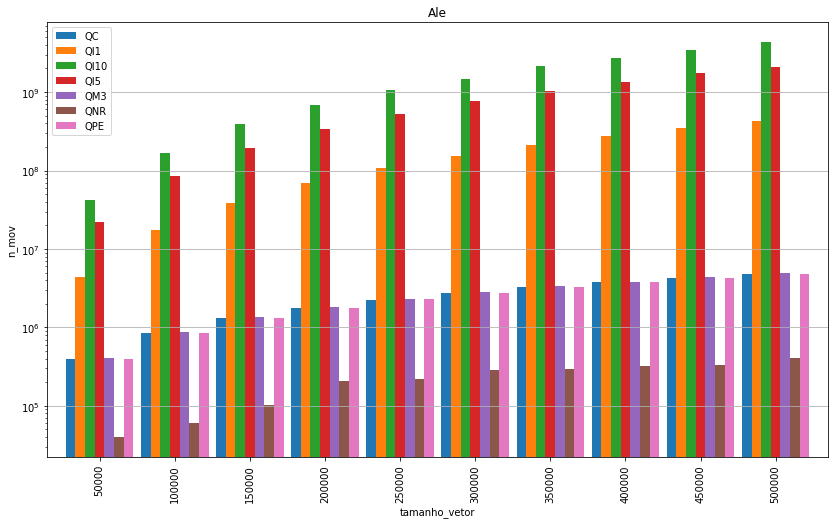

In [9]:
plotar_comparativo('n_mov', 'Ale')

Com vetores aleatórios, grupo de algoritmos 3 (os de inserção) mostraram o maior número de movimentações de elementos dentro do vetor de entrada. Quanto maior a taxa mínima para a inserção iniciar, maior foi o número de movimentações. Os algoritmos clássico, QPE e mediana-3 mostraram uma quantidade de movimentações relativamente pequena e estável. O não-recursivo apresentou, de longe, o menor número de movimentações, chegando a manter uma média de 1/10 de movimentações comparado ao grupo de segundo melhor desempenho (!).

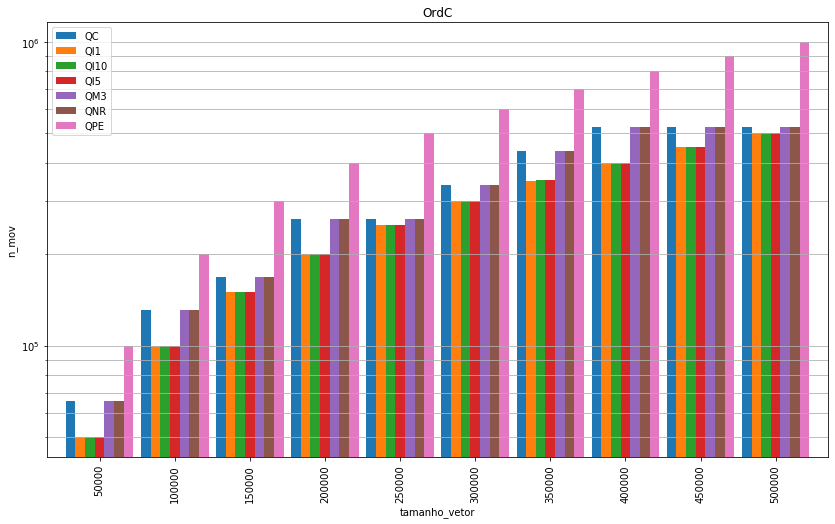

In [10]:
plotar_comparativo('n_mov', 'OrdC')
plt.grid(True, which='both', axis='y')

O número de movimentações apresenta a menor variância entre um algoritmo e outro quando o vetor está ordenado, de tal forma que as diferenças aqui chegam a ser irrisórias, salva a exceção do QPE. Os algoritmos mistos de inserção não mostram nenhuma diferença entre si no número de movimentações, obtendo os melhores resultados, enquanto o QM3, QC e o QNR apresentam uma quantidade ligeiramente maior de movimentações.

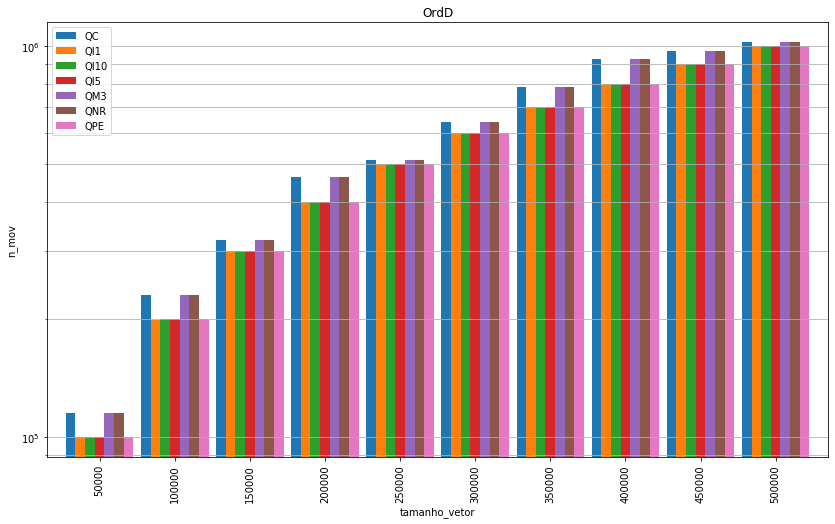

In [11]:
plotar_comparativo('n_mov', 'OrdD')
plt.grid(True,which='both',axis='y')

Com o vetor ordenado de forma decrescente, o número de movimentações do QPE equiparou-se ao dos mistos de inserção, sendo o grupo formado por estes quatro algoritmos o de melhor desempenho. O QNR, QC e QM3 mostraram um desempenho ligeiramente menor, obtendo um número de comparações um pouco maior, mas tendendo a equiparar-se ao outro grupo na medida que o tamanho do vetor de entrada cresce.

## Número de comparações

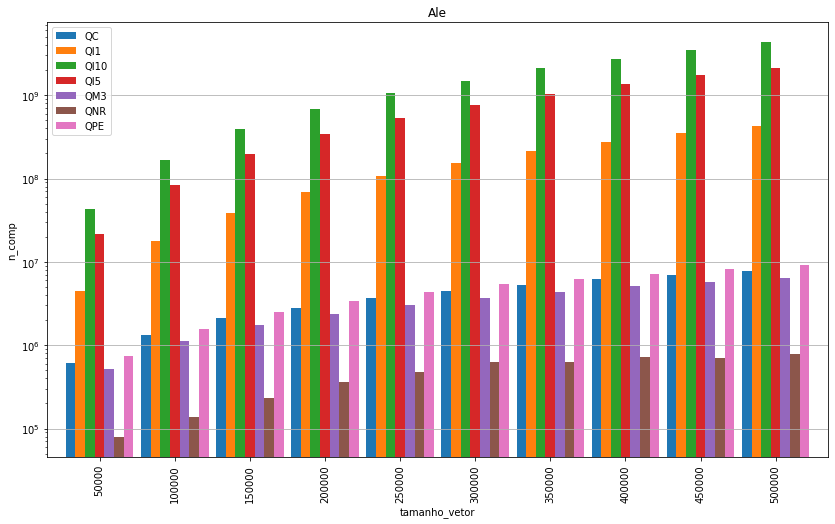

In [12]:
plotar_comparativo('n_comp', 'Ale')

Com a entrada aleatória, o algoritmo não-recursivo volta a se destacar e obtém o menor número de comparações com uma boa margem de diferença. Em segundo lugar, o clássico, o M3 e o QPE mostram números similares entre si, e os mistos de inserção apresentam o pior desempenho em termos de comparações, com piora crescente na medida em que o percentual mínimo para iniciar a inserção aumenta.

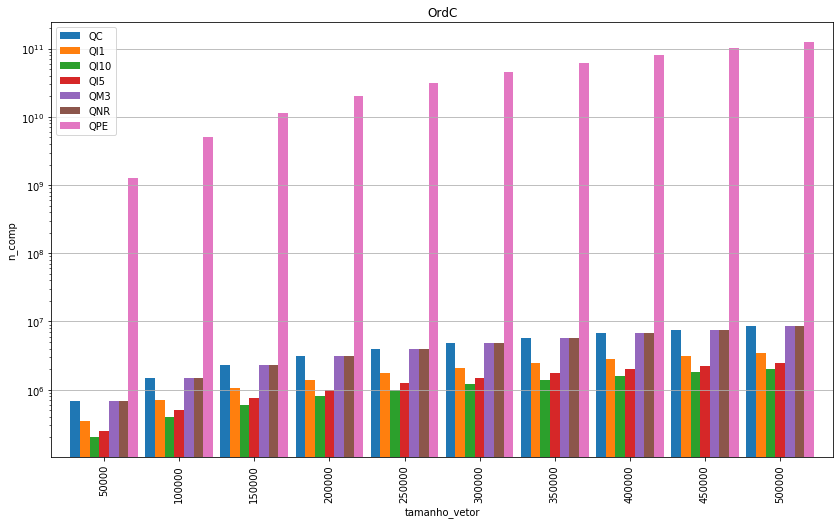

In [13]:
plotar_comparativo('n_comp', 'OrdC')

O QPE volta a mostrar o pior desempenho em se tratando de comparações, no caso de vetor ordenado de forma crescente; os mistos de inserção apresentam a melhor eficiência, conseguindo um número até 3x menor que os restantes; e o QC, QNR e QM3 se mostram entre os dois grupos, mas consideravelmente mais próximos do caso de inserção.

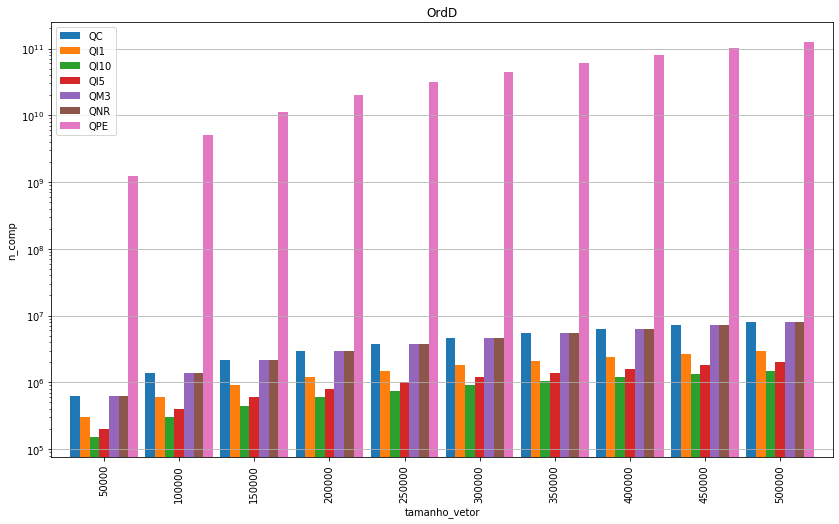

In [14]:
plotar_comparativo('n_comp', 'OrdD')

O aumento na quantidade mesclada de inserção volta a aprimorar o quicksort no caso em que o vetor está ordenado de forma decrescente; o grupo QC/QM3/QNR apresentam volumes de 2 a 3 vezes maiores que os mistos/inserção; e o QPE mostra o maior volume de comparações.

# Conclusões

O quicksort não-recursivo possui o melhor caso médio, apresentando bom desempenho em termos de comparações, movimentações e de tempo, tendo em vista que ele utiliza quantidade menor da pilha na memória que os outros algoritmos. Além disso, ele é estável e varia pouco nos casos extremos (vetor ordenado crescente / decrescente), mostrando-se bastante robusto em comparação com os outros algoritmos. O quicksort com pivô no primeiro elemento é o menos robusto, que pode estourar consideravelmente a performance em casos extremos, mas não apresenta nenhuma melhoria comparado a outros algoritmos mais robustos quando a entrada é aleatória.

Os casos mesclados com inserção são mais eficazes que o restante quando a entrada está razoavelmente organizada (em ordem crescente ou decrescente), mas são bastante lentos quando a entrada é aleatória. Em contrapartida, o quicksort clássico, o de mediana 3 e o não-recursivo apresentam maior robustez que depende menos da organização do vetor de entrada. O QPE é o menos confiável, enquanto o QNR, o QC e o QM3 mostram-se os mais robustos e eficientes no caso médio. O uso mesclado com inserção pode ser interessante em casos onde se sabe que o vetor de entrada está consideravelmente (mas não inteiramente) ordenado; fora isso, o grupo QNR/QC/QM3 são os mais indicados (em especial, o QNR, por consumir menos tempo e menos memória no geral, apresentando menor chance de estourar a pilha).

# Bibliografia

Os algoritmos de ordenação e da estrutura de dados do tipo pilha foram implementados com base no livro do Cornen e nos slides passados em aula, mas adaptados para o trabalho em uma classe Quicksort que reaproveitava o código 'particao' para diferentes pivôs e aceitava o pivô como entrada, para evitar redundância de código.